<a href="https://colab.research.google.com/github/davidfalca0/Projeto_Acidentes_Aereos/blob/main/Projeto_Acidentes_Aereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIBLIOTECA

In [1]:
%matplotlib inline
import pandas as pd #Para criação de DataFrames
import matplotlib.pyplot as plt #Para plotagem
import random

import numpy as np 
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

#Pandas#
O Pandas vem com um conjunto de opções e configurações que podem ser alteradas pelo usuário. Eles podem ser um grande aumento de produtividade porque permitem que você personalize completamente seu ambiente Pandas ao seu gosto. Por exemplo: alterar algumas das configurações de exibição do Pandas para alterar o número de linhas e colunas exibidas e a precisão de exibição de números de ponto flutuante (VOITTO, 2021).


#Matplotlib#
Matplotlib é uma biblioteca para criar gráficos e visualizar dados projetados para a linguagem de programação Python. Além disso, fornece uma interface de programação orientada a objetos para incluir gráficos por meio de kits de ferramentas GUI, como Tkinter, Wxpython, Qt ou GTK (MEDIUM, 2020). 

#Random#
Random é um módulo que faz parte da linguagem Python e é utilizado para gerar números pseudo-aleatórios. Também podemos selecionar os elementos de uma lista de forma aleatória ou exibir o seu resultado embaralhado


#NumPy#
O NumPy é usado principalmente para realizar cálculos em matrizes multidimensionais. O NumPy fornece um grande número de funções e operações de biblioteca que ajudam os programadores a realizar cálculos numéricos facilmente. A biblioteca Pandas é usada para análise de dados.


#Seaborn#
A biblioteca Seaborn funciona em cima do matplotlib e ajuda a melhorar a aparência da figura e torná-la mais completa (VOOOO, 2017).


#Scipy/scipy.stats#
SciPy é o pacote principal para rotinas científicas em Python, projetado para operar em arrays numpy de forma eficiente para que numpy e scipy funcionem em paralelo. 
Scipy contém várias ferramentas dedicadas a problemas comuns em computação científica. Seus diferentes submódulos correspondem a diferentes aplicações, como interpolação, integração, otimização, processamento de imagens, estatística, funções especiais, etc. (UFPR, ?).

#Collections conter# 
Counter é uma subclasse da subclasse dict e é usada para contar objetos hasheáveis. 
É uma coleção onde os elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário.
 A contagem pode ser qualquer valor inteiro, incluindo contagens zero e negativas. A classe Counter é semelhante a bags ou multisets em outras linguagens (PYTHON, ?)


IMPORTAÇÃO DE DADOS

In [2]:
ocorrencia = pd.read_csv('https://raw.githubusercontent.com/davidfalca0/Projeto_Acidentes_Aereos/main/ocorrencias_cenipa.csv')

#Conferência de Dados Importados#

In [3]:
print('https://raw.githubusercontent.com/davidfalca0/Projeto_Acidentes_Aereos/main/ocorrencias_cenipa.csv" ' + str(ocorrencia.shape[0]) + ' linhas e ' + str(ocorrencia.shape[1]) + ' colunas')

https://raw.githubusercontent.com/davidfalca0/Projeto_Acidentes_Aereos/main/ocorrencias_cenipa.csv" 5242 linhas e 21 colunas


#Leitura de Dados#

In [4]:
ocorrencia.head(5)

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


Acima você pode verificar como o arquivo está estruturado. Como disse no código anteriormente, o arquivo "ocorrencias_cenipa.csv" contém 5242 linhas e 21 colunas.

Em seguida, quero descobrir como a linguagem Python está identificando cada coluna. Será que ele está tratando o código da ocorrência como número inteiro ou string? O comando dtypes nos responderá.

In [5]:
ocorrencia.dtypes

codigo                        int64
tipo                         object
descricao                    object
cidade                       object
estado                       object
data                         object
ano                           int64
hora                         object
aeronave_liberada            object
status_investigacao          object
aeronaves_envolvidas          int64
ocorrencia_saida_pista       object
aeronave_tipo                object
aeronave_fabricante          object
motor_tipo                   object
aeronave_motor_quantidade    object
aeronave_assentos             int64
aeronave_ano_fabricacao       int64
aeronave_pais_fabricante     object
aeronave_fase_operacao       object
aeronave_nivel_dano          object
dtype: object

Perceba que cada linha abaixo do comando dtypes representa uma coluna do conjunto de dados "ocorrencias_cenipa.csv", totalizando 22 linhas.

O próximo passo é tratar os nomes das colunas que iremos trabalhar. Vamos exibir cada uma delas, usando o comando columns da biblioteca pandas.

In [6]:
ocorrencia.columns

Index(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'],
      dtype='object')

ocorrencias_cenipa.csv é um arquivo relativamente grande. Ele possui muitas linhas e colunas que concedem muitos detalhes a cerca da ocorrência registrada, contudo, não precisamos de todas elas para esse estudo. A fim de deixar a exibição mais apresentável e limpa, vamos eliminar algumas colunas que não precisaremos, como o numero do relatório, comando investigador e aerodromo

#Inserindo coluna para contagem#

In [7]:
ocorrencia['contagem'] = 1

In [8]:
ocorrencia['codigo'].dropna(axis = 0, inplace = True)

Veja como ficou nosso novo DataFrame.

In [9]:
ocorrencia.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano,contagem
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE,1
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL,1
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL,1
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA,1
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE,1


#Visualização dos Dados#

A variável **descricao**, que armazenará as informações deste dataset agrupadas por tipo. A **coluna** contagem será somada, retornando um gráfico com o total de ocorrências para cada **tipo**.


In [10]:
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

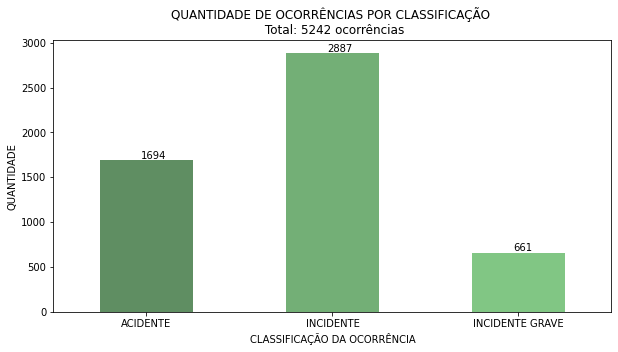

In [11]:
classificacao = ocorrencia.groupby('tipo')['contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO \n Total: ' + str(ocorrencia['contagem'].sum()) + ' ocorrências')
plt.show()

Como podemos ver no gráfico, as ocorrências são divididas em três principais classificações: Acidente, incidente e Incidente Grave. Vale lembrar que, embora este arquivo trate de ocorrências envolvendo aeronaves nos últimos 10 anos, não significa que todas as ocorrências foram graves ou que houveram fatalidades. Muitos dos casos são sim, de quedas de avião decorrente de alguma falha humana ou mecânica, mas você verá mais a frente que nem todos são assim.



#Classificando os tipos de ocorrências que existem e qual foi sua frequência nestes últimos anos?#

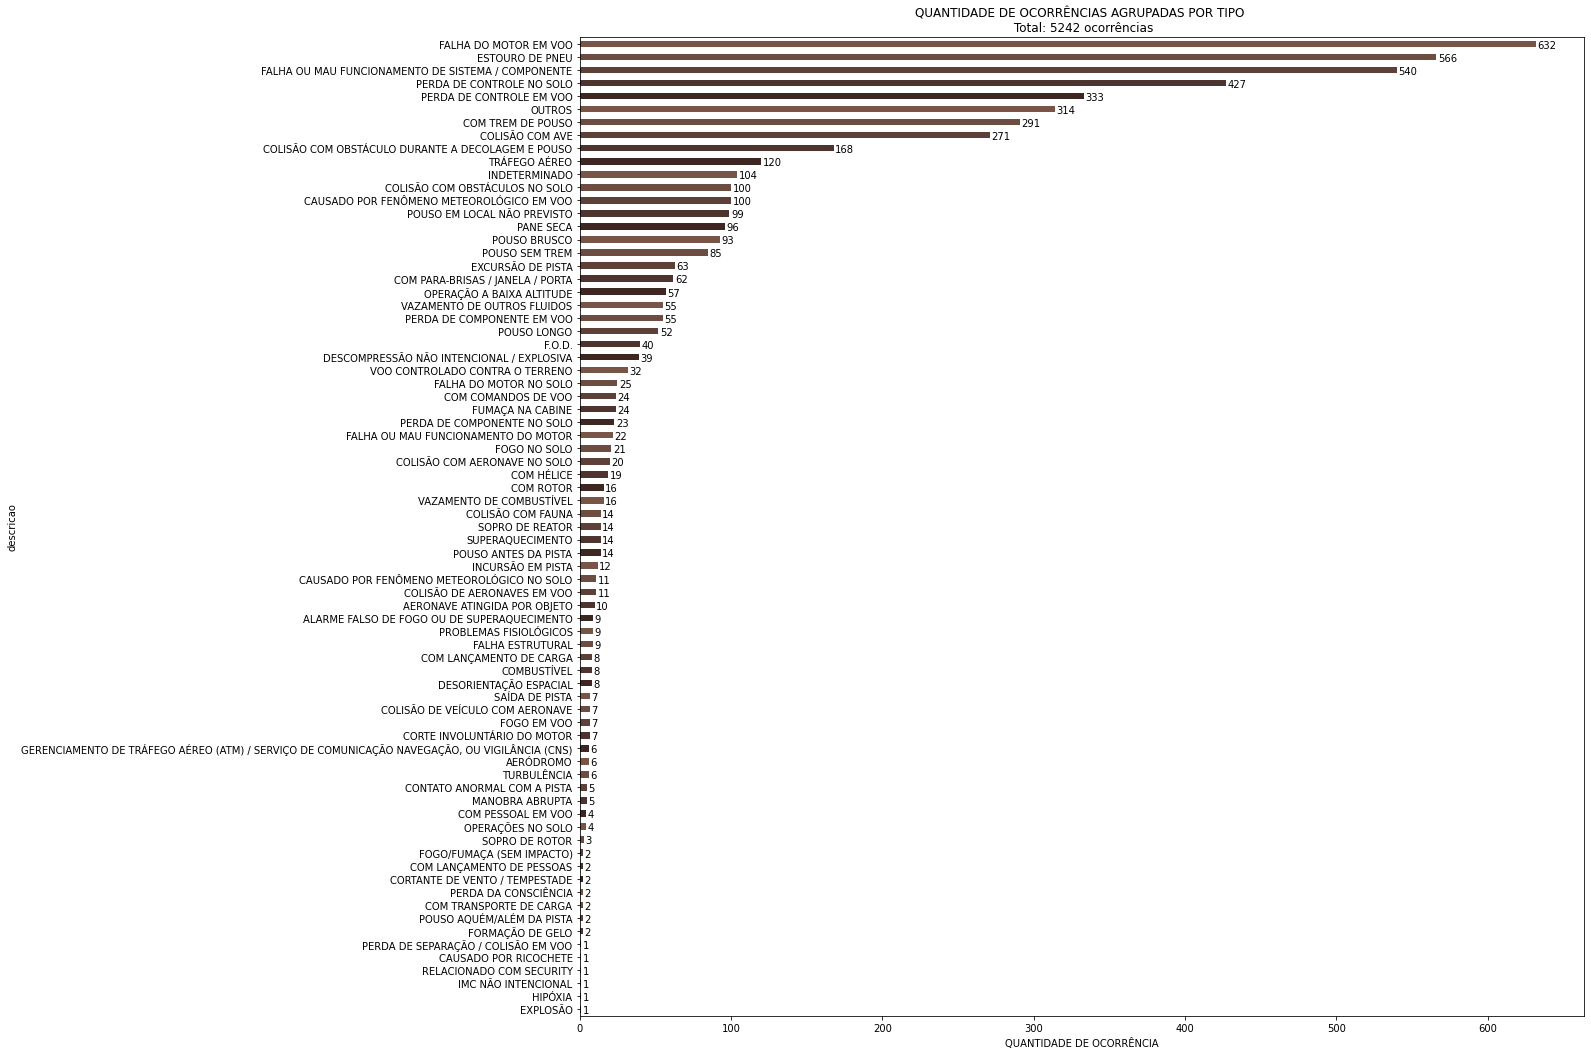

In [12]:
ax = ocorrencia.groupby('descricao')['contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(18,18))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(ocorrencia['contagem'].sum()) + ' ocorrências')
plt.ylabel('descricao')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

O processo de geração deste gráfico foi semelhante ao anterior: juntamos todos os dados da coluna 'tipo' e adicionamos os valores da coluna 'contagem'.

De acordo com os dados desse plot, as maiores causas de ocorrências são devidas a falhas de motor durante o vôo, seguida por perda de controle em solo e perda de controle em vôo. Embora tais causas nos remetam a falha humana na operação, não podemos levar isto como uma regra. Uma perda de controle em vôo pode dever-se desde incompetência técnica até falha em dispositivos como o radar. Todavia, a escala destes três principais motivos é uma causa a se preocupar.





Sudeste é a região que foi encontrada mais acidente, incidentes e incidentes graves em geral.

Nordeste é a região que se encontra a menor quantidade de acidentes e incidentes graves 

Centro Oeste é a região que se encontra a menor quantidade de incidente.

#Ocorrências por ano, mês e dia

In [20]:
# Agrupamentos de Datas
agrupamento_ano = ocorrencia.groupby(ocorrencia['data'].dt.year)['codigo'].count()
agrupamento_mes = ocorrencia.groupby(ocorrencia['data'].dt.month)['codigo'].count()
agrupamento_dia = ocorrencia.groupby(ocorrencia['data'].dt.day)['codigo'].count()

#Ocorrências por ano

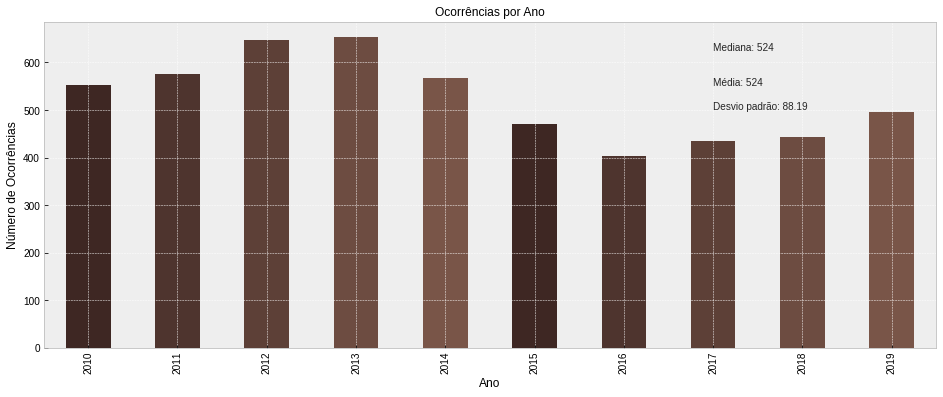


Representatividade - Anos
2013    12.46
2012    12.34
2011    10.99
2014    10.82
2010    10.53
2019     9.46
2015     8.99
2018     8.45
2017     8.28
2016     7.69
Name: data, dtype: float64


In [21]:
#Ocorrências por Ano


agrupamento_ano.plot.bar(figsize=(16,6),color=random.choice(colors))
plt.style.use("seaborn")
plt.title("Ocorrências por Ano")
plt.text(7, 600.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_ano))),size=10)
plt.text(7, 550.9, 'Média: %d'%(np.mean(np.array(agrupamento_ano))),size=10)
plt.text(7, 500.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_ano)),size=10)  
plt.xlabel("Ano")
plt.ylabel("Número de Ocorrências")
plt.grid(True,color='white')


plt.show()

print('\nRepresentatividade - Anos')
percentual_ano = round((ocorrencia.data.dt.year.value_counts() / ocorrencia.shape[0])*100.,2)

print(percentual_ano)

A média é de 524 de ocorrências por ano.

2013 é onde teve o maior número de ocorrências por ano.

2016 é onde teve o menor número de ocorrências por ano.


#Ocorrências por mês

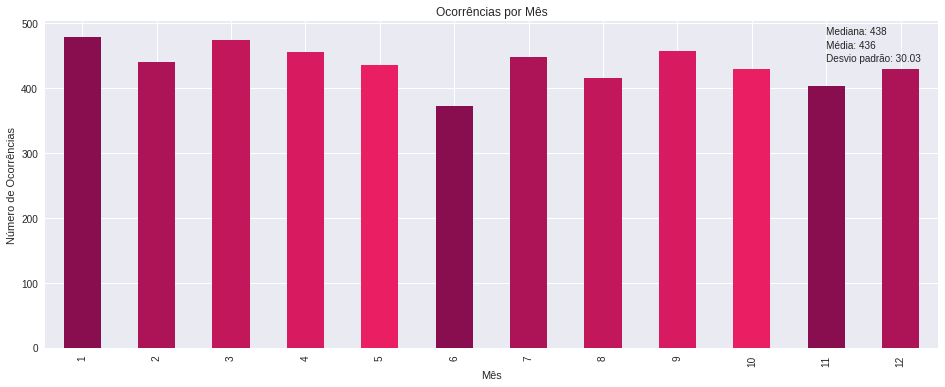


Representatividade - Meses
1     9.14
3     9.04
9     8.74
4     8.70
7     8.55
2     8.41
5     8.32
10    8.20
12    8.18
8     7.92
11    7.69
6     7.12
Name: data, dtype: float64


In [22]:
#Ocorrências por Mês


agrupamento_mes.plot.bar(figsize=(16,6),color=random.choice(colors))
plt.style.use("seaborn")
plt.title("Ocorrências por Mês")
plt.text(10, 465.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_mes))),size=10)
plt.text(10, 460.9, 'Média: %d'%(np.mean(np.array(agrupamento_mes))),size=10)
plt.text(10, 440.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_mes)),size=10)  
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.grid(True,color='white')


plt.show()

print('\nRepresentatividade - Meses')
percentual_mes = round((ocorrencia.data.dt.month.value_counts() / ocorrencia.shape[0])*100.,2)

print(percentual_mes)

A média é de 436 de ocorrências por mês

Janeiro é onde teve o maior número de ocorrências por mês.

Junho é onde teve o menor número de ocorrências por mês



#Ocorrências por dia

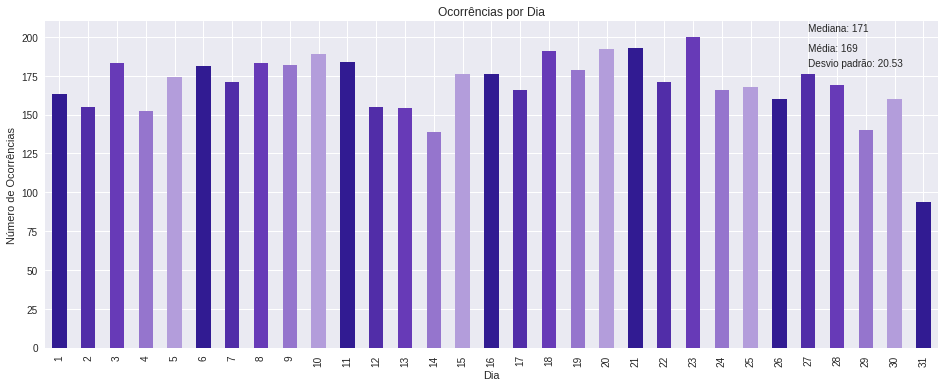


Representatividade - Dias
23    3.82
21    3.68
20    3.66
18    3.64
10    3.61
11    3.51
3     3.49
8     3.49
9     3.47
6     3.45
19    3.41
15    3.36
16    3.36
27    3.36
5     3.32
7     3.26
22    3.26
28    3.22
25    3.20
24    3.17
17    3.17
1     3.11
30    3.05
26    3.05
12    2.96
2     2.96
13    2.94
4     2.90
29    2.67
14    2.65
31    1.79
Name: data, dtype: float64


In [23]:
#Ocorrências por Dia
agrupamento_dia.plot.bar(figsize=(16,6),color=random.choice(colors))
plt.style.use("seaborn")
plt.title("Ocorrências por Dia")
plt.text(26, 195.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_dia))),size=10)
plt.text(26, 190.9, 'Média: %d'%(np.mean(np.array(agrupamento_dia))),size=10)
plt.text(26, 180.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_dia)),size=10) 
plt.xlabel("Dia")
plt.ylabel("Número de Ocorrências")
plt.grid(True,color='white')

plt.show()


print('\nRepresentatividade - Dias')
percentual_dia = round((ocorrencia.data.dt.day.value_counts() / ocorrencia.shape[0])*100.,2)

print(percentual_dia)

Dia 23 foi o dia que teve o maior número de ocorrências.

Dia 31 foi o dia que teve o menor número de ocorrências.

A média foi de 169. 

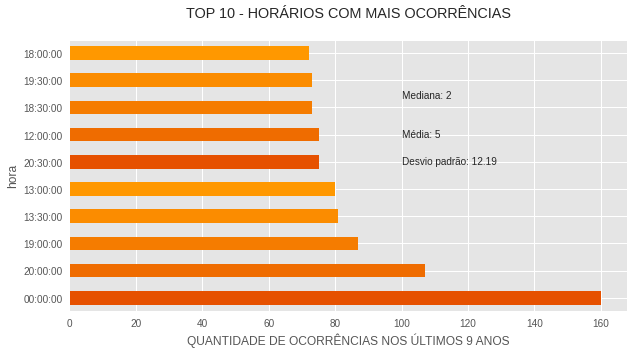

hora
00:00:00    160
20:00:00    107
19:00:00     87
13:30:00     81
13:00:00     80
20:30:00     75
12:00:00     75
18:30:00     73
19:30:00     73
18:00:00     72
Name: codigo, dtype: int64

In [26]:
#Agrupamento por Horas
agrupamento_hora = ocorrencia.groupby('hora')['codigo'].count().sort_values(ascending = False)

agrupamento_hora.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('TOP 10 - HORÁRIOS COM MAIS OCORRÊNCIAS\n')
plt.text(100, 6.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_hora))),size=10)
plt.text(100, 5.9, 'Média: %d'%(np.mean(np.array(agrupamento_hora))),size=10)
plt.text(100, 4.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_hora)),size=10) 
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 9 ANOS')
plt.show()


agrupamento_hora.head(10)

Onde: 
00:00 (MEIA-NOITE) foi o horário que teve o maior número de ocorrências.

18:00 (SEIS HORAS) foi o horário que teve o menor número de ocorrências.

A média foi de 5.

#As cidades que mais registraram ocorrências

In [24]:
cidade = Counter(ocorrencia['cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador_cidade = sorted(list(cidade.values()), reverse = True)

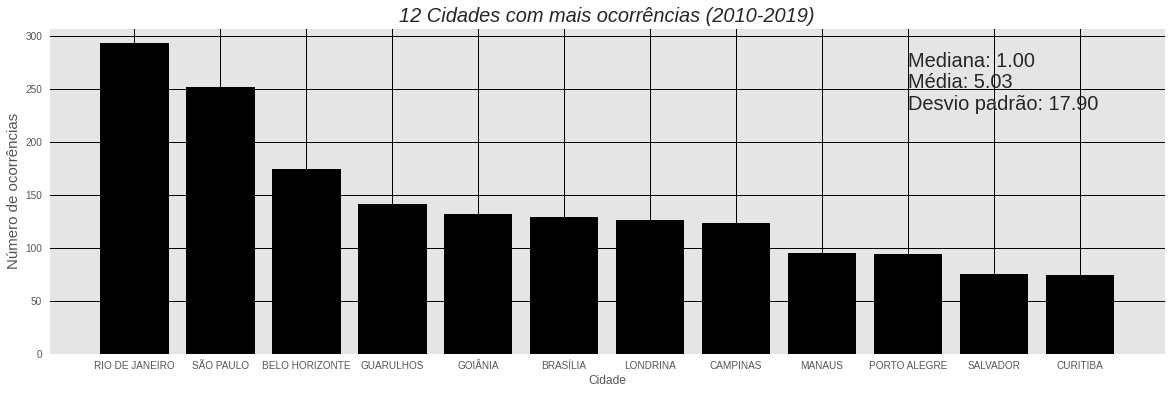

In [27]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(20,6))

x=fase_cidade[:12]
y=contador_cidade[:12]

rects1=ax.bar(x, y,color='black')

plt.xlabel('Cidade')
ax.set_xticks(x)
plt.ylabel("Número de ocorrências",size=15)
plt.title('12 Cidades com mais ocorrências (2010-2019)',size=20,style='italic')
plt.text(9, 270.9, 'Mediana: %.2f'%(np.median(np.array(contador_cidade))),size=20)
plt.text(9, 250.9, 'Média: %.2f'%(np.mean(np.array(contador_cidade))),size=20)
plt.text(9, 230.8, 'Desvio padrão: %.2f'%(static.stdev(contador_cidade)),size=20)   

plt.grid(True,color='black')
plt.show()

Rio de Janeiro foi a cidade que teve o maior número de ocorrências.

Curitiba foi a cidade que teve o menor número de ocorrências

A média de ocorrência por cidade foi de 5,03

#Estados que mais registraram ocorrências

In [29]:
estado = Counter(ocorrencia['estado'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

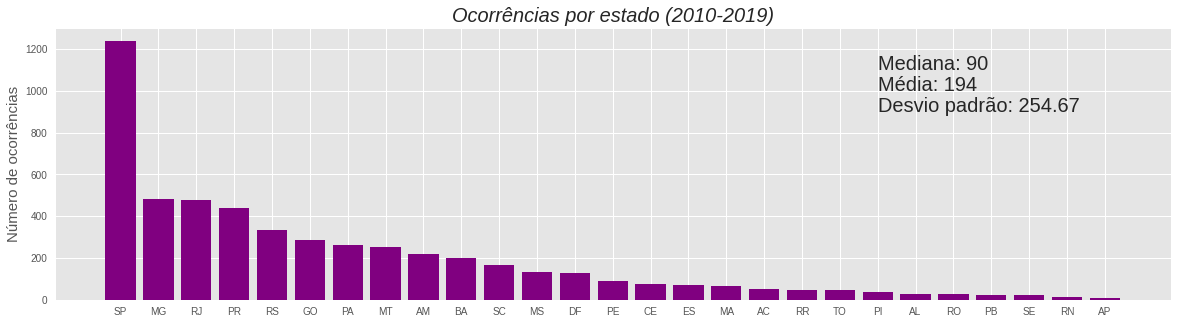

In [30]:
plt.style.use("ggplot")

fig,ax = plt.subplots(figsize=(20,5))#tamanho do grafico

x=fase_estado
y=contador_estado

rects1=ax.bar(x, y,color='purple')#barras do grafico 

ax.set_xticks(x)
plt.title('Ocorrências por estado (2010-2019)',style='italic', size=20) #titulo principal
plt.ylabel("Número de ocorrências", size=15)# titulo a esquerda
plt.text(20, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))),size=20) #legenda
plt.text(20, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))),size=20)#legenda
plt.text(20, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)),size=20)  #legenda 

plt.grid(True,color='white') #quadrados no grafico
plt.show()

São Paulo foi o estado que teve o maior número de ocorrências.

Amapá o estado que teve o menor número de ocorrências.

A média de ocorrência por estados foi de 194.

#Assentos na aeronave


In [31]:
ocorrencia[['aeronaves_envolvidas','aeronave_assentos']].describe().round(1)

,aeronaves_envolvidas,aeronave_assentos
count,5242.0,5242.0
mean,1.0,27.6
std,0.1,54.5
min,1.0,0.0
25%,1.0,2.0
50%,1.0,6.0
75%,1.0,10.0
max,3.0,384.0


In [32]:
(ocorrencia.isnull().sum()).sort_values(ascending=False)

codigo                       0
tipo                         0
Mes                          0
contagem                     0
aeronave_nivel_dano          0
aeronave_fase_operacao       0
aeronave_pais_fabricante     0
aeronave_ano_fabricacao      0
aeronave_assentos            0
aeronave_motor_quantidade    0
motor_tipo                   0
aeronave_fabricante          0
aeronave_tipo                0
ocorrencia_saida_pista       0
aeronaves_envolvidas         0
status_investigacao          0
aeronave_liberada            0
hora                         0
ano                          0
data                         0
estado                       0
cidade                       0
descricao                    0
Dia                          0
dtype: int64

#REGIÕES

In [33]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(ocorrencia.loc[ocorrencia['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

#Quantidade de ocorrências por modelo/tipo de Aeronave

In [34]:
aeronave_tipo = Counter(ocorrencia['aeronave_tipo'])

#os tipos de aeronave individualmente, ordenados ascendemente
tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)

#a quantidade de ocorrências, ordenados ascendemente
contador_tipo = sorted(list(aeronave_tipo.values()), reverse = True)

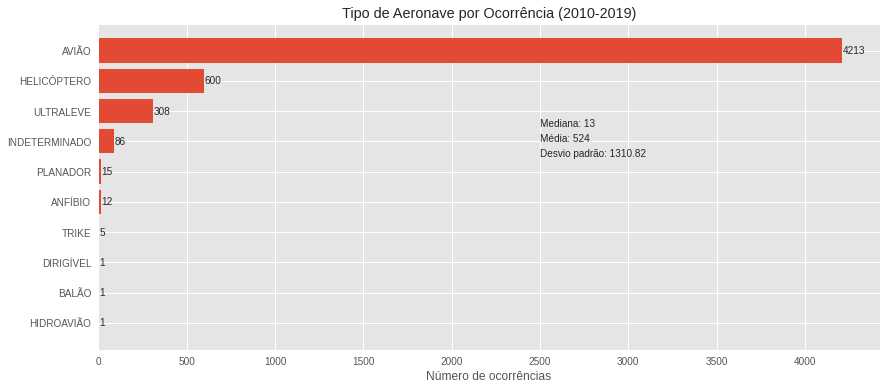

In [35]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x=tipo
y=contador_tipo

rects1=ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Tipo de Aeronave por Ocorrência (2010-2019)')

# estatísticas do tipo de aeronave por ocorrência
plt.text(2500, 2.5, 'Mediana: %d'%(np.median(np.array(contador_tipo))))
plt.text(2500, 3.0, 'Média: %d'%(np.mean(np.array(contador_tipo))))
plt.text(2500, 3.5, 'Desvio padrão: %.2f'%(static.stdev(contador_tipo)))

plt.show()

Aviões tem muito mais ocorrências do que helicópteros de 2010 - 2019


#Os tipos de motor com mais ocorrências

In [36]:
motor_tipo = Counter(ocorrencia['motor_tipo'])
fase_motor_tipo = sorted(motor_tipo, key = motor_tipo.get, reverse = True)
contador_motor_tipo = sorted(list(motor_tipo.values()), reverse = True)

Text(2500, 2.6, 'Desvio padrão: 1079.64')

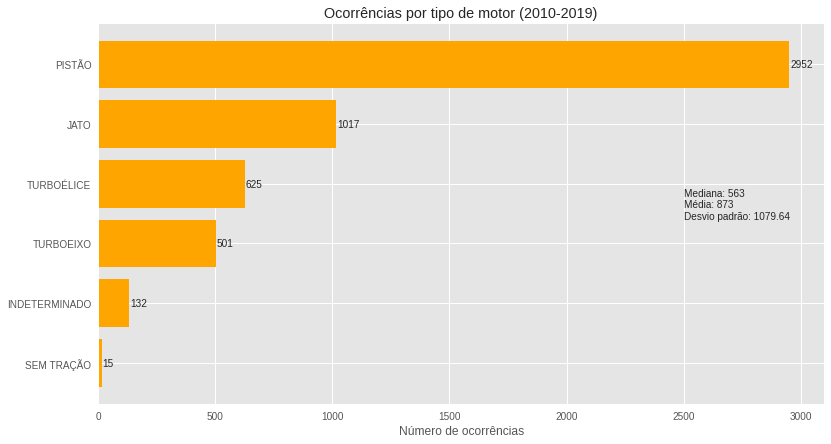

In [37]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_motor_tipo
y=contador_motor_tipo

ax.barh(x, y, color='orange')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.title('Ocorrências por tipo de motor (2010-2019)')
plt.text(2500, 2.2, 'Mediana: %d'%(np.median(np.array(contador_motor_tipo))))
plt.text(2500, 2.4, 'Média: %d'%(np.mean(np.array(contador_motor_tipo))))
plt.text(2500, 2.6, 'Desvio padrão: %.2f'%(static.stdev(contador_motor_tipo)))

Os tipos de motores pistão tem os maiores números de ocorrências geradas. Esse motor é um dos mais antigos motores de aeronave no mundo.

#Ocorrências por Quantidade de motor

In [38]:
aeronave_motor_quantidade = Counter(ocorrencia['aeronave_motor_quantidade'])
fase_aeronave_motor_quantidade = sorted(aeronave_motor_quantidade, key = aeronave_motor_quantidade.get, reverse = True)
contador_aeronave_motor_quantidade = sorted(list(aeronave_motor_quantidade.values()), reverse = True)

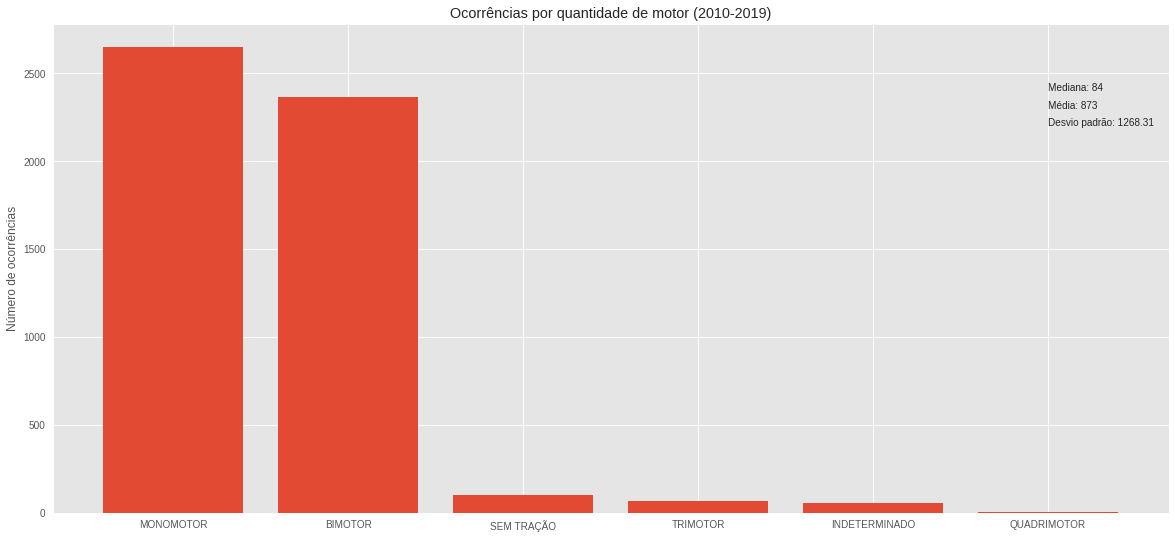

In [39]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(20, 9))

x=fase_aeronave_motor_quantidade
y=contador_aeronave_motor_quantidade

rects1=ax.bar(x, y)

plt.xlabel('')
ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por quantidade de motor (2010-2019)')
plt.text(5, 2400.2, 'Mediana: %d'%(np.median(np.array(contador_aeronave_motor_quantidade))))
plt.text(5, 2300.4, 'Média: %d'%(np.mean(np.array(contador_aeronave_motor_quantidade))))
plt.text(5, 2200.5, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_motor_quantidade)))

#numero_em_cima(rects1, ax)

plt.show()

O monotor tem as maiores quantidades de ocorrências geradas.

#Ocorrência por saída de pista

In [40]:
ocorrencia_saida_pista = Counter(ocorrencia['ocorrencia_saida_pista'])
fase_ocorrencia_saida_pista = sorted(ocorrencia_saida_pista, key = ocorrencia_saida_pista.get, reverse = True)
contador_ocorrencia_saida_pista = sorted(list(ocorrencia_saida_pista.values()), reverse = True)

In [41]:
ano_sim = list(set(ocorrencia['ano']))
todos_sim = list(ocorrencia.loc[(ocorrencia['ocorrencia_saida_pista']) == 'SIM', ['ano']]
                         ['ano'])
qtd_sim_ano = pd.DataFrame({'ano': ano_sim, 'SIM': [todos_sim.count(i) for i in ano_sim]})
qtd_sim_ano = qtd_sim_ano.sort_values(['SIM'])
soma_sim= qtd_sim_ano['SIM'].sum()

In [42]:
ano_nao = list(set(ocorrencia['ano']))
todos_nao= list(ocorrencia.loc[(ocorrencia['ocorrencia_saida_pista']) == 'NÃO', ['ano']]
                         ['ano'])
qtd_nao_ano = pd.DataFrame({'ano': ano_nao, 'NÃO': [todos_nao.count(i) for i in ano_nao]})
qtd_nao_ano = qtd_nao_ano.sort_values(['NÃO'])
soma_nao= qtd_nao_ano['NÃO'].sum()

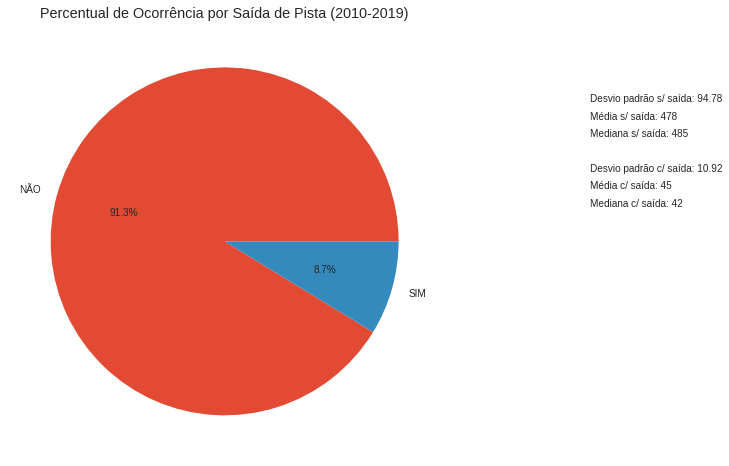

In [43]:
plt.style.use("ggplot")
plt.title('Percentual de Ocorrência por Saída de Pista (2010-2019)')
ocorrencia['ocorrencia_saida_pista'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,figsize=(10, 8))
plt.ylabel('')
plt.text(2.1, 0.2, 'Mediana c/ saída: %d'%(np.median(np.array(qtd_sim_ano['SIM']))))
plt.text(2.1, 0.3, 'Média c/ saída: %d'%(np.mean(np.array(qtd_sim_ano['SIM']))))
plt.text(2.1, 0.4, 'Desvio padrão c/ saída: %.2f'%(static.stdev(qtd_sim_ano['SIM'])))
plt.text(2.1, 0.6, 'Mediana s/ saída: %d'%(np.median(np.array(qtd_nao_ano['NÃO']))))
plt.text(2.1, 0.7, 'Média s/ saída: %d'%(np.mean(np.array(qtd_nao_ano['NÃO']))))
plt.text(2.1, 0.8, 'Desvio padrão s/ saída: %.2f'%(static.stdev(qtd_nao_ano['NÃO'])))

plt.show()

Análise de Status de Liberação das Aeronaves

#Liberação da aeronave

In [57]:
aeronave_liberada = list(set(ocorrencia['ano']))
todas_aeronave_liberada = list(ocorrencia.loc[(ocorrencia['aeronave_liberada']) == 'SIM', ['ano']]
                         ['ano'])
qtd_aeronave_liberada_ano = pd.DataFrame({'ano': aeronave_liberada, 'SIM': [todas_aeronave_liberada.count(i) for i in aeronave_liberada]})
qtd_aeronave_liberada_ano = qtd_aeronave_liberada_ano.sort_values(['SIM'])
total_qtd_aeronave_liberada_ano= qtd_aeronave_liberada_ano['SIM'].sum()

In [58]:
aeronave_nao_liberada = list(set(ocorrencia['ano']))
todas_aeronave_nao_liberada= list(ocorrencia.loc[(ocorrencia['ocorrencia_saida_pista']) == 'NÃO', ['ano']]
                         ['ano'])
qtd_nao_liberada_ano = pd.DataFrame({'ano': aeronave_nao_liberada, 'NÃO': [todas_aeronave_nao_liberada.count(i) for i in aeronave_nao_liberada]})
qtd_nao_liberada_ano = qtd_nao_liberada_ano.sort_values(['NÃO'])
total_qtd_nao_liberada_ano= qtd_nao_liberada_ano['NÃO'].sum()

In [59]:
aeronave_indeterminada = list(set(ocorrencia['ano']))
todas_aeronave_indeterminada= list(ocorrencia.loc[(ocorrencia['ocorrencia_saida_pista']) == 'INDETERMINADO', ['ano']]
                         ['ano'])
qtd_aeronave_indeterminada_ano = pd.DataFrame({'ano': aeronave_indeterminada, 'INDETERMINADO': [todas_aeronave_indeterminada.count(i) for i in aeronave_indeterminada]})
qtd_aeronave_indeterminada_ano = qtd_aeronave_indeterminada_ano.sort_values(['INDETERMINADO'])
total_qtd_aeronave_indeterminada_ano= qtd_aeronave_indeterminada_ano['INDETERMINADO'].sum()

In [60]:
aeronave_liberada = Counter(ocorrencia['aeronave_liberada'])
fase_aeronave_liberada = sorted(aeronave_liberada, key = aeronave_liberada.get, reverse = True)
contador_aeronave_liberada = sorted(list(aeronave_liberada.values()), reverse = True)

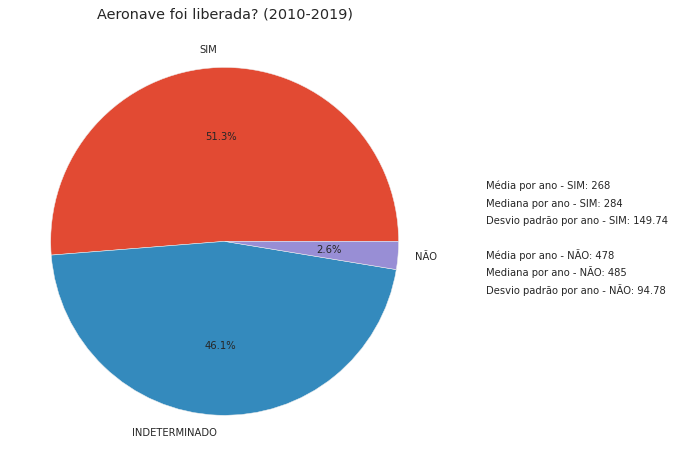

In [61]:
plt.style.use("ggplot")
plt.title('Aeronave foi liberada? (2010-2019)')

plt.text(1.5, 0.2, 'Mediana por ano - SIM: %d'%(np.median(np.array(qtd_aeronave_liberada_ano['SIM']))))
plt.text(1.5, 0.3, 'Média por ano - SIM: %d'%(np.mean(np.array(qtd_aeronave_liberada_ano['SIM']))))
plt.text(1.5, 0.1, 'Desvio padrão por ano - SIM: %.2f'%(static.stdev(qtd_aeronave_liberada_ano['SIM'])))

plt.text(1.5, -0.2, 'Mediana por ano - NÃO: %d'%(np.median(np.array(qtd_nao_liberada_ano['NÃO']))))
plt.text(1.5, -0.1, 'Média por ano - NÃO: %d'%(np.mean(np.array(qtd_nao_liberada_ano['NÃO']))))
plt.text(1.5, -0.3, 'Desvio padrão por ano - NÃO: %.2f'%(static.stdev(qtd_nao_liberada_ano['NÃO'])))

status = ocorrencia['aeronave_liberada'].value_counts().plot(kind='pie',autopct='%1.1f%%',label='',figsize=(15,8))

A maior parte das ocorrências teve as aeronaves liberada, representando 51,3%.

A média de ocorrências com a aeronave liberada foi de 268 por ano.

A média de ocorrências com a aeronave indeterminada foi de 478 por ano.

# Investigação

In [62]:
status_finalizada= list(set(ocorrencia['ano']))
dados_status_finalizada = list(ocorrencia.loc[(ocorrencia['status_investigacao']) == 'FINALIZADA', ['ano']]['ano'])
qtd_status_finalizada_ano = pd.DataFrame({'ANO': status_finalizada, 'FINALIZADA': [dados_status_finalizada.count(i) for i in status_finalizada]})
qtd_status_finalizada_ano = qtd_status_finalizada_ano.sort_values(['FINALIZADA'])
soma_status_finalizada= qtd_status_finalizada_ano['FINALIZADA'].sum()

In [63]:
status_ativa= list(set(ocorrencia['ano']))
dados_status_ativa = list(ocorrencia.loc[(ocorrencia['status_investigacao']) == 'ATIVA', ['ano']]['ano'])
qtd_status_ativa_ano = pd.DataFrame({'ANO': status_ativa, 'ATIVA': [dados_status_ativa.count(i) for i in status_ativa]})
qtd_status_ativa_ano = qtd_status_ativa_ano.sort_values(['ATIVA'])
soma_status_ativa= qtd_status_ativa_ano['ATIVA'].sum()

In [64]:
status_indeterminada= list(set(ocorrencia['ano']))
dados_status_indeterminada = list(ocorrencia.loc[(ocorrencia['status_investigacao']) == 'INDETERMINADA', ['ano']]['ano'])
qtd_status_indeterminada_ano = pd.DataFrame({'ANO': status_indeterminada, 'INDETERMINADA': [dados_status_indeterminada.count(i) for i in status_indeterminada]})
qtd_status_indeterminada_ano = qtd_status_indeterminada_ano.sort_values(['INDETERMINADA'])
soma_status_indeterminada= qtd_status_indeterminada_ano['INDETERMINADA'].sum()

In [65]:
status_investigacao = Counter(ocorrencia['status_investigacao'])
fase_status_investigacao = sorted(status_investigacao, key = status_investigacao.get, reverse = True)
contador_status_investigacao = sorted(list(status_investigacao.values()), reverse = True)

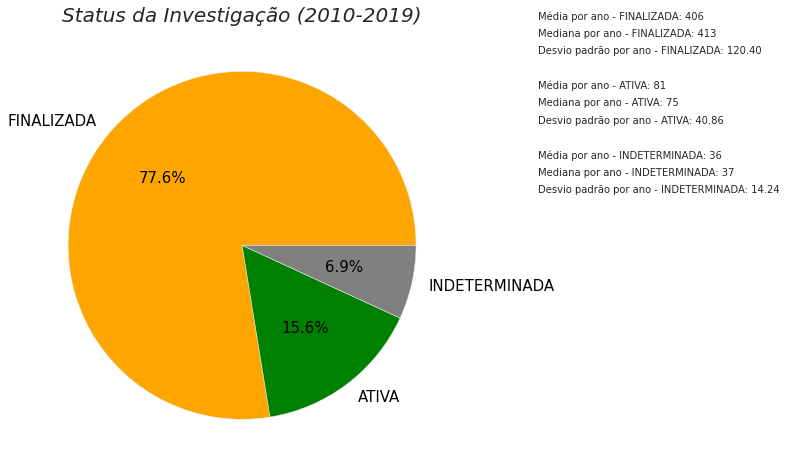

In [66]:
plt.style.use("ggplot")

plt.title('Status da Investigação (2010-2019)',size=20,style='italic')

plt.text(1.7, 1.2, 'Mediana por ano - FINALIZADA: %d'%(np.median(np.array(qtd_status_finalizada_ano['FINALIZADA']))),size=10)
plt.text(1.7, 1.3, 'Média por ano - FINALIZADA: %d'%(np.mean(np.array(qtd_status_finalizada_ano['FINALIZADA']))),size=10)
plt.text(1.7, 1.1, 'Desvio padrão por ano - FINALIZADA: %.2f'%(static.stdev(qtd_status_finalizada_ano['FINALIZADA'])),size=10)

plt.text(1.7, 0.8, 'Mediana por ano - ATIVA: %d'%(np.median(np.array(qtd_status_ativa_ano['ATIVA']))),size=10)
plt.text(1.7, 0.9, 'Média por ano - ATIVA: %d'%(np.mean(np.array(qtd_status_ativa_ano['ATIVA']))),size=10)
plt.text(1.7, 0.7, 'Desvio padrão por ano - ATIVA: %.2f'%(static.stdev(qtd_status_ativa_ano['ATIVA'])),size=10)

plt.text(1.7, 0.4, 'Mediana por ano - INDETERMINADA: %d'%(np.median(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))),size=10)
plt.text(1.7, 0.5, 'Média por ano - INDETERMINADA: %d'%(np.mean(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))),size=10)
plt.text(1.7, 0.3, 'Desvio padrão por ano - INDETERMINADA: %.2f'%(static.stdev(qtd_status_indeterminada_ano['INDETERMINADA'])),size=10)

status = ocorrencia['status_investigacao'].value_counts().plot(kind='pie',
autopct='%1.1f%%',
label='',
figsize=(15,8),
colors = ( "orange", "G","grey"),
textprops = dict(color ="black",size=15))

Nota-se que a maior parte das ocorrências teve sua investigação finalizada, totalizando 77,6%, pois a maior parte das ocorrências são de gravidade baixa.

A menor parte das ocorrências teve a investigação indeterminada, representando 6,9% do total

A média de ocorrências finalizada foi de 406 por ano.

A média de ocorrências ativa foi de 81 por ano.

A média de ocorrências indeterminada foi de 36 por ano.

#Fabricantes das Aeronaves

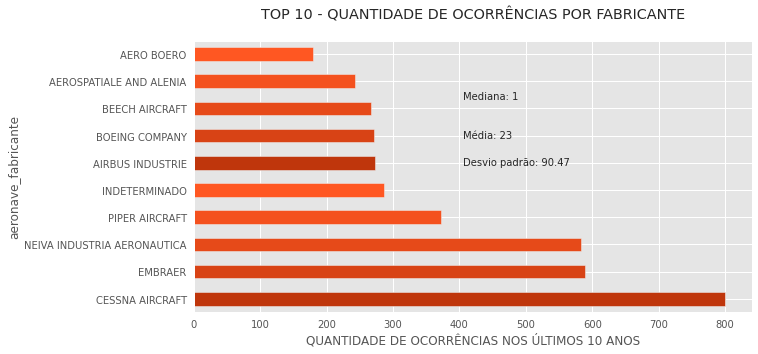


Representatividade - Fabricantes
CESSNA AIRCRAFT                          15.26
EMBRAER                                  11.24
NEIVA INDUSTRIA AERONAUTICA              11.12
PIPER AIRCRAFT                            7.12
INDETERMINADO                             5.46
                                         ...  
CLINICA MEDICA PRIETO & ANTUNES LTDA.     0.02
ECLIPSE AEROSPACE                         0.02
ROBERT MOHR                               0.02
MARIO CARLOS CARDOSO                      0.02
MARCO AURELIO M. DE SOUSA                 0.02
Name: aeronave_fabricante, Length: 223, dtype: float64


In [67]:
ocorrencias_fabricante = ocorrencia.groupby('aeronave_fabricante')['codigo'].count().sort_values(ascending = False)
ocorrencias_fabricante.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('TOP 10 - QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE\n')
plt.text(406, 6.9, 'Mediana: %d\n'%(np.median(np.array(ocorrencias_fabricante))),size=10)
plt.text(406, 5.9, 'Média: %d'%(np.mean(np.array(ocorrencias_fabricante))),size=10)
plt.text(406, 4.9, 'Desvio padrão: %.2f'%(static.stdev(ocorrencias_fabricante)),size=10) 
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

print('\nRepresentatividade - Fabricantes')
percentual_fabricantes = round((ocorrencia.aeronave_fabricante.value_counts() / ocorrencia.shape[0])*100.,2)

print(percentual_fabricantes)

#Ocorrência Por País de Fabricação

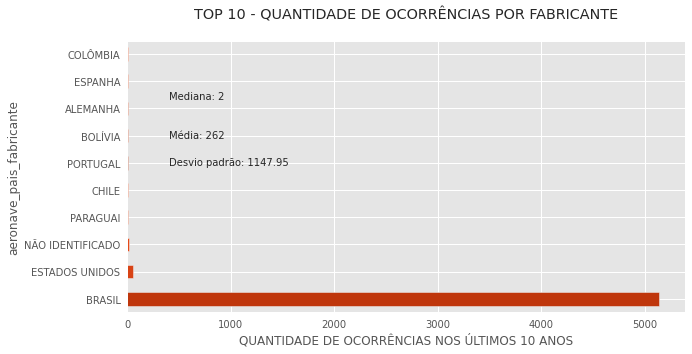


Representatividade - Fabricantes
BRASIL              98.04
ESTADOS UNIDOS       0.93
NÃO IDENTIFICADO     0.21
PARAGUAI             0.15
CHILE                0.10
PORTUGAL             0.10
BOLÍVIA              0.08
ALEMANHA             0.06
ESPANHA              0.06
PANAMÁ               0.04
FRANÇA               0.04
ARGENTINA            0.04
COLÔMBIA             0.04
ÁFRICA DO SUL        0.02
SUIÇA                0.02
URUGUAI              0.02
CINGAPURA            0.02
POLÔNIA              0.02
ITÁLIA               0.02
VENEZUELA            0.02
Name: aeronave_pais_fabricante, dtype: float64


In [68]:
ocorrencias_fabricante = ocorrencia.groupby('aeronave_pais_fabricante')['codigo'].count().sort_values(ascending = False)
ocorrencias_fabricante.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('TOP 10 - QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE\n')
plt.text(406, 6.9, 'Mediana: %d\n'%(np.median(np.array(ocorrencias_fabricante))),size=10)
plt.text(406, 5.9, 'Média: %d'%(np.mean(np.array(ocorrencias_fabricante))),size=10)
plt.text(406, 4.9, 'Desvio padrão: %.2f'%(static.stdev(ocorrencias_fabricante)),size=10) 
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

print('\nRepresentatividade - Fabricantes')
percentual_fabricantes = round((ocorrencia.aeronave_pais_fabricante.value_counts() / ocorrencia.shape[0])*100.,2)

print(percentual_fabricantes)

Nota-se que o país com mais aeronaves de fabricação foi o Brasil, devido ao grande circulo de aeronaves nacionais.

Consedirendo a media porr país foi de 262.

#Fase de Operação

In [69]:
aeronave_fase_operacao = Counter(ocorrencia['aeronave_fase_operacao'])
aeronave_fase = sorted(aeronave_fase_operacao, key = aeronave_fase_operacao.get, reverse = True)
contador_aeronave_fase_operacao = sorted(list(aeronave_fase_operacao.values()), reverse = True)

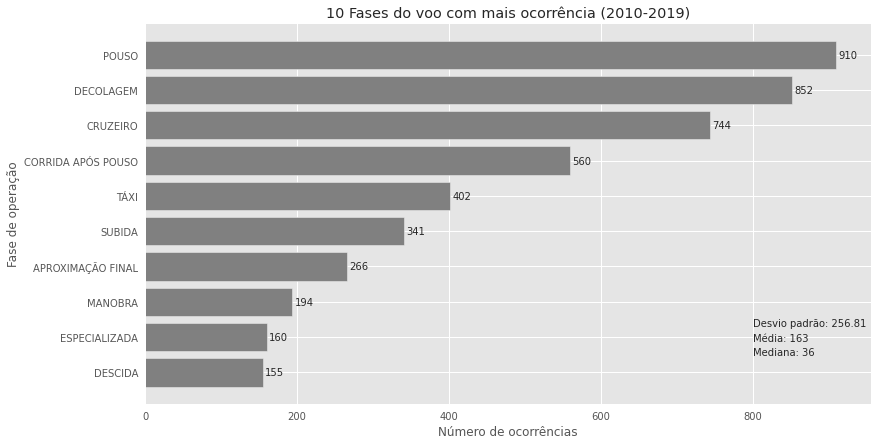

In [70]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=aeronave_fase[:10]
y=contador_aeronave_fase_operacao[:10]

ax.barh(x, y, color='grey')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')


ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.ylabel("Fase de operação")
plt.title('10 Fases do voo com mais ocorrência (2010-2019)')
plt.text(800, 8.5, 'Mediana: %d'%(np.median(np.array(contador_aeronave_fase_operacao))))
plt.text(800, 8.1, 'Média: %d'%(np.mean(np.array(contador_aeronave_fase_operacao))))
plt.text(800, 7.7, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_fase_operacao)))

plt.show()

Observa-se que a fase que apresentou mais ocorrências (910) nesse período foi o Pouso.

As fases que menos ocorrências (155) apresentou foi a Descida.

A média por fase nesse período ficou em 163 ocorrências.

#Nível de Dano

In [71]:
aeronave_nivel_dano = Counter(ocorrencia['aeronave_nivel_dano'])
fase_aeronave_nivel_dano = sorted(aeronave_nivel_dano, key = aeronave_nivel_dano.get, reverse = True)
contador_aeronave_nivel_dano = sorted(list(aeronave_nivel_dano.values()), reverse = True)

In [73]:
danos_nenhum = list(set(ocorrencia['ano']))
danos = list(ocorrencia.loc[(ocorrencia['aeronave_nivel_dano']) == 'NENHUM', ['ano']]['ano'])
qtd_nenhum_ano = pd.DataFrame({'ano': danos_nenhum, 'NENHUM': [danos.count(i) for i in danos_nenhum]})
qtd_nenhum_ano = qtd_nenhum_ano.sort_values(['NENHUM'])
soma_nenhum= qtd_nenhum_ano['NENHUM'].sum()

In [74]:
danos_leve = list(set(ocorrencia['ano']))
danos = list(ocorrencia.loc[(ocorrencia['aeronave_nivel_dano']) == 'LEVE', ['ano']]['ano'])
qtd_leve_ano = pd.DataFrame({'ano': danos_leve, 'LEVE': [danos.count(i) for i in danos_leve]})
qtd_leve_ano = qtd_leve_ano.sort_values(['LEVE'])
soma_leve= qtd_leve_ano['LEVE'].sum()

In [75]:
danos_substancial = list(set(ocorrencia['ano']))
danos = list(ocorrencia.loc[(ocorrencia['aeronave_nivel_dano']) == 'SUBSTANCIAL', ['ano']]['ano'])
qtd_substancial_ano = pd.DataFrame({'ano': danos_substancial, 'SUBSTANCIAL': [danos.count(i) for i in danos_substancial]})
qtd_substancial_ano = qtd_substancial_ano.sort_values(['SUBSTANCIAL'])
soma_substancial= qtd_substancial_ano['SUBSTANCIAL'].sum()

In [76]:
danos_destruida = list(set(ocorrencia['ano']))
danos = list(ocorrencia.loc[(ocorrencia['aeronave_nivel_dano']) == 'DESTRUÍDA', ['ano']]['ano'])
qtd_destruida_ano = pd.DataFrame({'ano': danos_destruida, 'DESTRUÍDA': [danos.count(i) for i in danos_destruida]})
qtd_destruida_ano = qtd_destruida_ano.sort_values(['DESTRUÍDA'])
soma_destruida= qtd_destruida_ano['DESTRUÍDA'].sum()

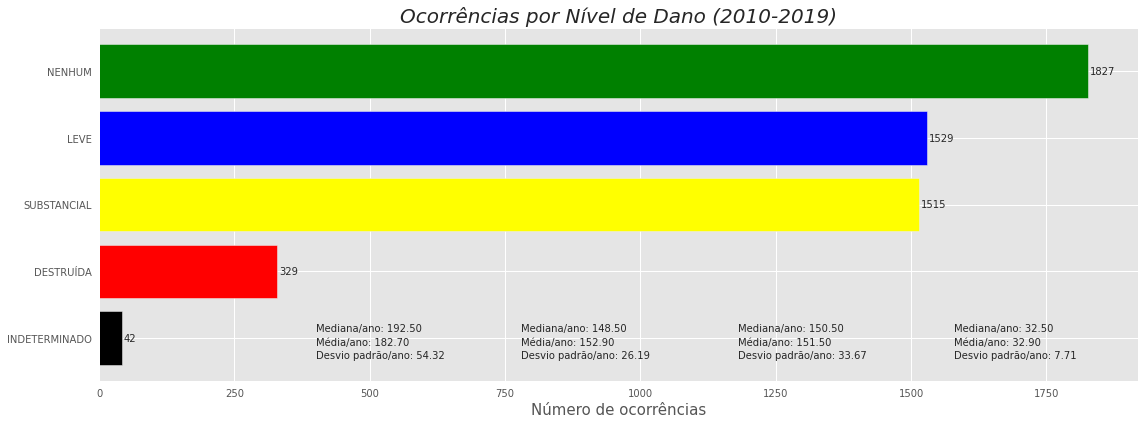

In [77]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(16, 6))

x=fase_aeronave_nivel_dano
y=contador_aeronave_nivel_dano

ax.barh(x, y, color=['g','blue','yellow','red','black'])

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências',size=15)

plt.title('Ocorrências por Nível de Dano (2010-2019)',size=20,style='italic')
plt.text(400, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_nenhum_ano['NENHUM']))),size=10)
plt.text(400, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_nenhum_ano['NENHUM']))),size=10)
plt.text(400, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_nenhum_ano['NENHUM'])),size=10)

plt.text(780, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_leve_ano['LEVE']))),size=10)
plt.text(780, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_leve_ano['LEVE']))),size=10)
plt.text(780, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_leve_ano['LEVE'])),size=10)

plt.text(1180, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_substancial_ano['SUBSTANCIAL']))),size=10)
plt.text(1180, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_substancial_ano['SUBSTANCIAL']))),size=10)
plt.text(1180, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_substancial_ano['SUBSTANCIAL'])),size=10)

plt.text(1580, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_destruida_ano['DESTRUÍDA']))),size=10)
plt.text(1580, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_destruida_ano['DESTRUÍDA']))),size=10)
plt.text(1580, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_destruida_ano['DESTRUÍDA'])),size=10)
plt.tight_layout(w_pad=4, h_pad=3)

A maior parte das ocorrências (1827) não gerou dano à aeronave.

A menor parte das ocorrências (42) gerou danos indeterminados

A média de ocorrências sem danos foi de 182,70 por ano.

A média de ocorrências com danos leves foi de 152,90 por ano.

A média de ocorrências com danos substanciais foi de 151,50 por ano.

A média de ocorrências destruindo a aeronave foi de 32,90 por ano.

#Regressão linear da quantidade de assentos pelo ano do acidente

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [79]:
logreg_model = LinearRegression()

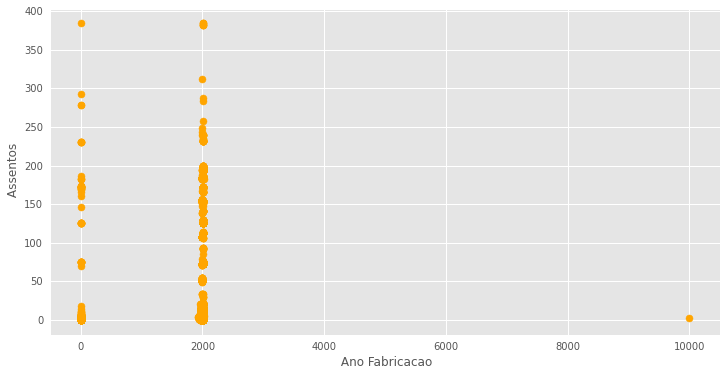

In [80]:
#Analisando dispersão dos dados de ano de fabricação da aeronave e número de assentos.
plt.figure(figsize=(12,6))
plt.scatter(
    ocorrencia.aeronave_ano_fabricacao,
    ocorrencia.aeronave_assentos,
    c='orange'
)

plt.xlabel(' Ano Fabricacao')
plt.ylabel(' Assentos')
plt.show()

No grafico apresentado acima existem dois tipos de eixos, nos quais o eixo X tem como representatividade os anos de fabricações de aeronaves que tiveram algum tipo de ocorrência, no eixo Y tem como representatividade os assentos presentes nessas aeronaves. 

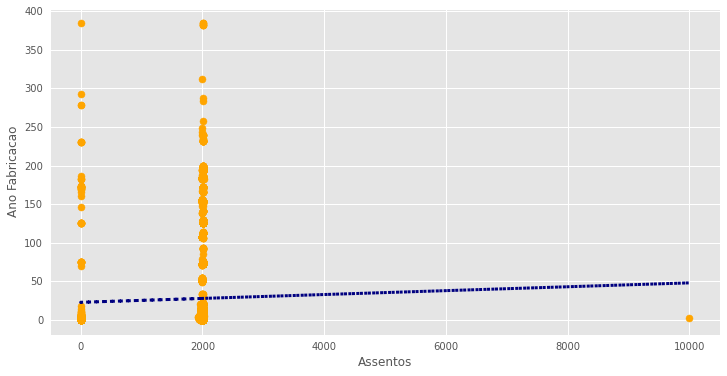

In [81]:
# Traçando a linha de Regressão
X =  ocorrencia.aeronave_ano_fabricacao.values.reshape(-1,1)
y = ocorrencia.aeronave_assentos.values.reshape(-1,1)
reg = LinearRegression()

reg.fit(X, y)
previsoes = reg.predict(X)

plt.figure(figsize=(12,6))
plt.scatter(
  ocorrencia.aeronave_ano_fabricacao,
  ocorrencia.aeronave_assentos,
    c='orange'
)

plt.plot(
    ocorrencia.aeronave_ano_fabricacao,
    previsoes,
    c='navy',
    linewidth=3,
    linestyle=':'
)

plt.xlabel('Assentos')
plt.ylabel('Ano Fabricacao')
plt.show()


No grafico apresentado acima existem dois tipos de eixos, nos quais o eixo X tem como representatividade os assentos, no eixo Y tem como representatividade os anos de fabricações presentes nessas aeronaves. 

Observa-se que os assentos foram crescendo ao longo dos anos, tendo em vista que as aeronaves viraram veículos de uso civil e de uso militar.

Analisando o grafico é possivel visualizar o alto número de ocorrencia, tendo como base a cor de linha azul, tendo como consideração que existem cada vez mais aeronaves levantando voô.

Nota-se que os números de ocorrências de aeronaves que comportam um número menor de passageiros (pequeno porte), são maiores que as aeronaves de grande porte, o que se dá a conclusão de que
seus protocolos de segurança contém diversas falhas.

#2° Modelo de Regressão Linear

In [82]:
#Criação das variáveis para verificar uma regressão linear de número de assentos x incidentes
aeronave_assentos = Counter(ocorrencia['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

In [83]:
# Criação do DataFrame para incidentes x assentos
dataframe = pd.DataFrame()
dataframe['y'] = fase_aeronave_assentos
dataframe['x'] = contador_aeronave_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

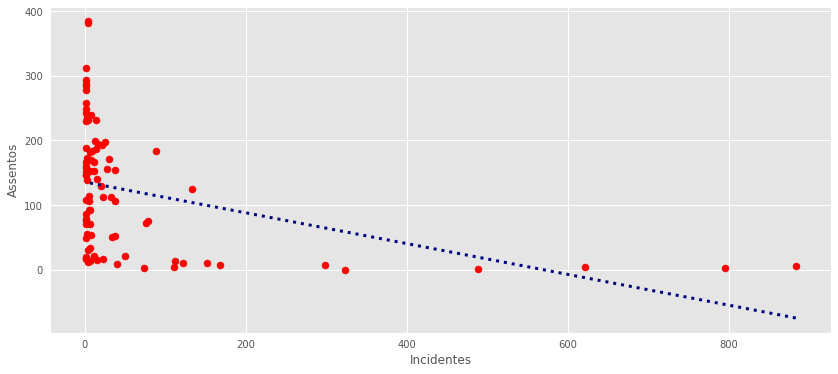

In [84]:
#Plotando o gráfico da nova regressão linear
plt.figure(figsize=(14,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values,c="red")

# traçando a linha da regressão com as variáveis do DataFrame
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
# plotando um gráfico em cima do outro para visualizar.
plt.plot(dataframe['x'].values, reta(dataframe['x'].values),   c='navy',  linestyle=':', linewidth=3)
plt.xlabel('Incidentes')
plt.ylabel('Assentos')
plt.show()

O gráfico representa o eixo X com incidentes em algum tipo de ocorrência, já o eixo Y do gráfico representa a quantidade de assentos destas aeronaves.

#Conclusão

É fato que tem acontecido muitos acidentes em tão pouco tempo, visto que as viagens aéreas são consideradas as mais seguras. Mas por que o voô tem deixado de ser seguro assim? A resposta é que ela não deixou de ser segura, e sim, por falta de manutenções nas aeronaves, falhas humanas ou até mesmo a falta de qualidade na entrega das aeronaves são os causadores desses acidentes.

De acordo o estudo acima, analisando os fatos entre 2010 e 2019, o ano que teve mais acidentes foi em 2013, com mais de 600 acidentes. A maioria dos acidentes têm se dado por falhas mecânicas nos aviões. Vale lembrar que os motores que têm apresentado mais falhas são os fabricados no Brasil para aeronaves Monomotores e Bimotores. Em seguida, outro grande causador dos acidentes tem sido a falha humana, que tem se dado por perda de controle no pouso e durante o voô, colisôes com obstáculos durante o pouso e durante a decolagem e etc. Infelizmente o estado que mais tem sofrido com isso é São Paulo, seguido de Minas Gerais.

Com isso chegamos a conclusão que, visto a tecnologia que nós temos hoje, falhas mecânicas e falhas humanas poderiam ser cada vez mais evitadas com treinamentos das tripulações, aperfeiçoamentos dos motores brasileiros e com uma melhor fiscalização das aeronaves.

#Referências

CENIPA, Sobre nós, disponível em: https://cenipavirtual.aer.mil.br/
Pandas DataFrame, 2021. 

Disponível em: https://www.w3resource.com/pandas/dataframe.
Python and this documentation, 2021. 

Disponível em: https://docs.python.org/.

G1.Brasileiros estão viajando mais de avião que de ônibus. [S.I], 2010. Disponível em:http://g1.globo.com/bom-dia-brasil/noticia/2010/08/brasileiros-estao-viajando-mais-de-aviao-que-de-onibus.html.
UFPR. 4. SciPy. [S.I.]. [?]. 

Disponível em:http://www.estruturas.ufpr.br/disciplinas/pos-graduacao/introducao-a-computacao-cientifica-com-python/introducao-python/capitulo-4-scipy.

https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira
Matplotlib Documentação.

Disponível em: https://matplotlib.org/stable/index.html#.
isão geral do pacote. Pandas, 2011. 

Disponível em:https://pandas.pydata.org/docs/getting_started/overview.html.
